# **Аналитика эффективности маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях НКО Благотворительная Больница**

**Выполнила проект:**  
**Татьяна Лисина**  
Telegram @bestearthman  

 **НКО Благотворительная Больница занимается оказанием помощи людям, оставшимся без дома и медицинской помощи.**  
 **Выводы от проведенного анализа должны помочь привлечь больше денежных средств для этой цели.**  

 **“ Каждый имеет право на базовую медицинскую помощь, вне зависимости от наличия денег, документов и крыши над головой.”**

**Цель проекта:**  
Проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях. Найти любые интересные закономерности.

**Особенности проекта:**  

*   Работа с сырыми данными
*   Работа с данными Яндекс.Метрики
*   Написание статьи по итогам проекта






## Общая информация

Датасеты:
*   adgrants - данные с сайта, собранные с помощью Яндекс.Метрики
*   clients - данные из платежной системы
*   donors - данные из платежной системы







## Библиотеки и среда

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import datetime
from datetime import datetime

import numpy as np
import math
from scipy import stats as st
from google.colab import files

In [ ]:
from dateutil.relativedelta import relativedelta

In [ ]:
!pip install termcolor
from termcolor import colored

In [ ]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

In [ ]:
# ЛИНИЯ в Unicode для подчеркивания вывода в print()
line_length = 100
line = '\u2500' * line_length

_line =  '\n' + '\u2500' * line_length
line_ = '\u2500' * line_length + '\n'

## Датасеты - описание

In [ ]:
url = 'https://drive.usercontent.google.com/download?id=11h02W3C5KzZG8XNQ_4wnLwTLod5VHMhl&export=download&authuser=0&confirm=t&uuid=cd2d7966-c529-4032-9008-c100dd358d80&at=APZUnTV2D_xCXndD2m-iQGCDSBvp:1697905361287'
adgrants = pd.read_csv(url, delimiter=';', skiprows=4)

url = 'https://drive.usercontent.google.com/download?id=1CNO_QLKVRGgP38iEYQa2iJJH9z6gii9h&export=download&authuser=0&confirm=t&uuid=3a55ac7e-0696-4203-aadb-3d528fe44050&at=APZUnTXqHlBNtINsDkEajEeMvhKH:1697905362339'
clients = pd.read_excel(url)

url = 'https://drive.usercontent.google.com/download?id=1KUsl_jPB-TArEajPT5dfEZp0BiQM9J9P&export=download&authuser=0&confirm=t&uuid=89287b81-d104-415f-88b0-bb4f83d904e8&at=APZUnTUOHRfw7C3lEHF48ikWytbq:1697905363159'
donors = pd.read_excel(url)

In [ ]:
# Словарь имеющихся датасетов
dfs = {'adgrants':adgrants, 'clients':clients, 'donors':donors}

In [ ]:
def info (dfs):
  for name,value in dfs.items():
    print('\033[1mДатасет -\033[0m', '\033[1m{}\033[0m'.format(name))
    print(value.shape)
    display(value.head())
    value.info()
    print()
    print()
info(dfs)

Датасет - adgrants
(308023, 46)


,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308023 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Дата                                       308023 non-null  object
 1   Кампания                                   308023 non-null  object
 2   № Кампании                                 308023 non-null  int64 
 3   Метка                                      308023 non-null  object
 4   Условие показа                             308023 non-null  object
 5   Пол                                        308023 non-null  object
 6   Уровень платежеспособности                 308023 non-null  object
 7   Возраст                                    308023 non-null  object
 8   Показы                                     308023 non-null  int64 
 9   Взвешенные показы                          308023 non-null  object
 10  Клики               

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 813 non-null    int64  
 1   Тип донора                         813 non-null    object 
 2   Дата первого пожертвования         795 non-null    object 
 3   Сумма первого пожертвования        795 non-null    float64
 4   Кампания первого пожертвования     795 non-null    object 
 5   Метки донора                       0 non-null      float64
 6   Кампании                           795 non-null    object 
 7   Платёжные операторы                795 non-null    object 
 8   Дата последнего пожертвования      795 non-null    object 
 9   Сумма последнего пожертвования     795 non-null    float64
 10  Кампания последнего пожертвования  795 non-null    object 
 11  Общая сумма пожертвований          813 non-null    int64  

# Предобработка данных

In [ ]:
# Словарь имеющихся датасетов
dfs = {'adgrants':adgrants, 'clients':clients, 'donors':donors}

## Дубликаты

In [ ]:
# функция для просмотра и удаления явных дубликатов
def dup (dfs):
  print('\033[1mКоличество удалённых явных дубликатов:\033[0m',)
  for name, value in dfs.items():
    print(name, value.duplicated().sum())
    value.drop_duplicates(inplace=True)
dup(dfs)

Количество удалённых явных дубликатов:
adgrants 25
clients 0
donors 0


In [ ]:
# Количество пустых строк (удаление df.dropna())
def empty_raws(dfs):
  print('\033[1mКоличество пустых строк:\033[0m',)
  for name,value in dfs.items():
    empty_rows = value[value.isnull().all(axis=1)]
    print(name, len(empty_rows))
empty_raws(dfs)

Количество пустых строк:
adgrants 0
clients 0
donors 0


## Столбцы

In [ ]:
# Переименуем все столбцы на английский
def english_columns(dfs):
    translator = Translator()
    translated_columns = {}

    for name, value in dfs.items():
      for column in value.columns:
          translation = translator.translate(column, dest='en').text
          translated_columns[column] = translation
      value.rename(columns=translated_columns, inplace=True)

english_columns(dfs)

In [ ]:
# Понизим регистр всех столбцов и заменим пробелы в названиях на underscore "_"
def lower(dfs):
  for name, value in dfs.items():
    value.columns = value.columns.str.lower()
    value.columns = value.columns.str.replace(' ', '_')
lower(dfs)

In [ ]:
# Создадим резервные копии датасетов
adgrants_copy = adgrants.copy()
clients_copy = clients.copy()
donors_copy = donors.copy()

In [ ]:
#adgrants.columns

In [ ]:
# Оставим только нужные столбцы в датасетах и переименуем удобнее
adgrants = adgrants[['date', 'campaign', 'no._campaign', 'a_condition_showed', 'gender',
       'the_level_of_solvency', 'age', 'shows', 'clicks', 'ctr_(%)', 'conversion_(%)']]

adgrants = adgrants.rename(columns={'a_condition_showed':'condition_showed','the_level_of_solvency':'solvency',
                                    'ctr_(%)':'ctr_perc','conversion_(%)':'conversion'})

In [ ]:
# Оставим только нужные столбцы в датасетах и переименуем удобнее
clients = clients.drop(columns=['the_amount_per_month'])

clients.columns = ['id', 'first_payment', 'signature', 'signature_off', 'payment_type', 'payments_per_year', 'amount_per_year',
                   'avg_per_year', 'all_payments', 'total', 'avg', 'countries', 'regions', 'last_payment', 'code']

In [ ]:
# Оставим только нужные столбцы в датасетах и переименуем удобнее
donors = donors.drop(columns=["donor's_tags",'campaign','the_campaign_of_the_last_donation','currency'])

donors.columns = ['id', 'signature', 'first_payment', 'sum_first_payment', 'campaign', 'payment_operators', 'last_payment',
                  'amount_last_payment', 'total', 'code']

## Аномалии

In [ ]:
empty_payment = donors[donors[['sum_first_payment', 'amount_last_payment','total']].isnull().any(axis=1)]
print('В датасете donors', '\033[1m{}\033[0m'.format(len(empty_payment)),'строк с пустыми данными о платежах. Удалим их.') # жирный текст
# Удалим строки с пропусками в платежах
donors = donors.dropna(subset=['sum_first_payment', 'amount_last_payment','total']).reset_index()

В датасете donors 18 строк с пустыми данными о платежах. Удалим их.


In [ ]:
empty_payment = clients[clients['total'] == 0]
print('В датасете clients', '\033[1m{}\033[0m'.format(len(empty_payment)),'строк с пустыми данными о платежах. Удалим их.') # жирный текст
# Удалим строки с пропусками в платежах
clients = clients[clients['total'] != 0]

В датасете clients 211 строк с пустыми данными о платежах. Удалим их.


Мы удалили чуть больше 10% от всех данных о платежах.

## Формат даты

In [ ]:
# Переведем все даты к универсальному формату Y-M-D
adgrants['date'] = pd.to_datetime(adgrants['date'], format='%d.%m.%Y')

In [ ]:
clients['first_payment'] = pd.to_datetime(clients['first_payment'], format='%Y-%m-%d').dt.normalize()
clients['last_payment'] = pd.to_datetime(clients['last_payment'], format='%Y-%m-%d').dt.normalize()

In [ ]:
donors['first_payment'] = pd.to_datetime(donors['first_payment'], dayfirst=True).dt.normalize()
donors['last_payment'] = pd.to_datetime(donors['last_payment'], dayfirst=True).dt.normalize()

## Диапазон данных

In [ ]:
print(adgrants['date'].min())
print(adgrants['date'].max())
difference = relativedelta(adgrants['date'].max(), adgrants['date'].min())
print('Данные в clients собраны за {} месяцев и {} дня'.format(difference.years * 12 + difference.months, difference.days))

2023-01-15 00:00:00
2023-07-19 00:00:00
Данные в clients собраны за 6 месяцев и 4 дня


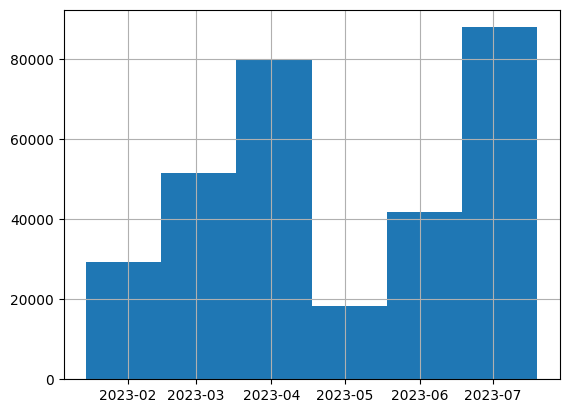

In [ ]:
adgrants['date'].hist(bins=6);

Распределение данных **неравномерное**. Диапазон совпадает с ТЗ - 2023 год.

In [ ]:
print(clients['first_payment'].min())
print(clients['last_payment'].max())
difference = relativedelta(clients['last_payment'].max(), clients['first_payment'].min())
print('Данные в clients собраны за {} месяцев и {} дней'.format(difference.years * 12 + difference.months, difference.days))

2021-11-17 00:00:00
2023-06-02 00:00:00
Данные в clients собраны за 18 месяцев и 16 дней


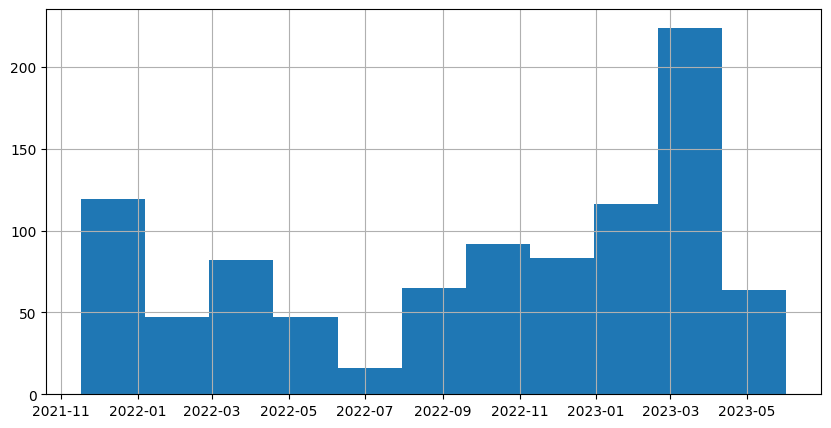

In [ ]:
clients['first_payment'].hist(bins=11, figsize=(10,5));

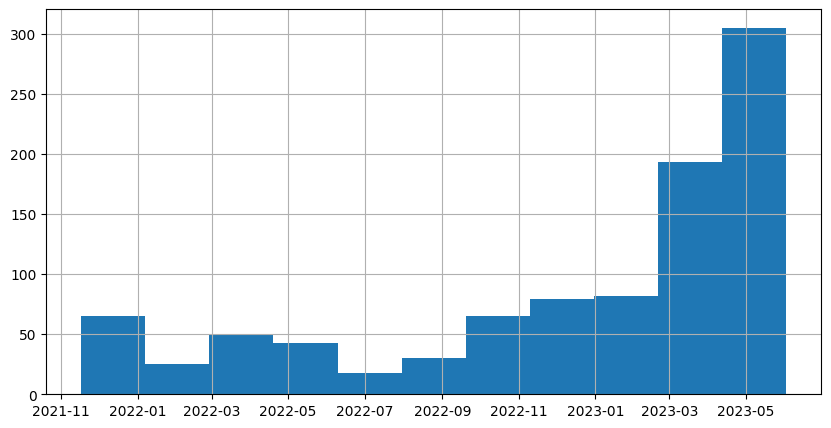

In [ ]:
clients['last_payment'].hist(bins=11, figsize=(10,5));

In [ ]:
print(donors['first_payment'].min())
print(donors['last_payment'].max())
difference = relativedelta(donors['last_payment'].max(), donors['first_payment'].min())
print('Данные в donors собраны за {} месяца и {} дней'.format(difference.years * 12 + difference.months, difference.days))

2022-06-15 00:00:00
2023-06-24 00:00:00
Данные в donors собраны за 12 месяца и 9 дней


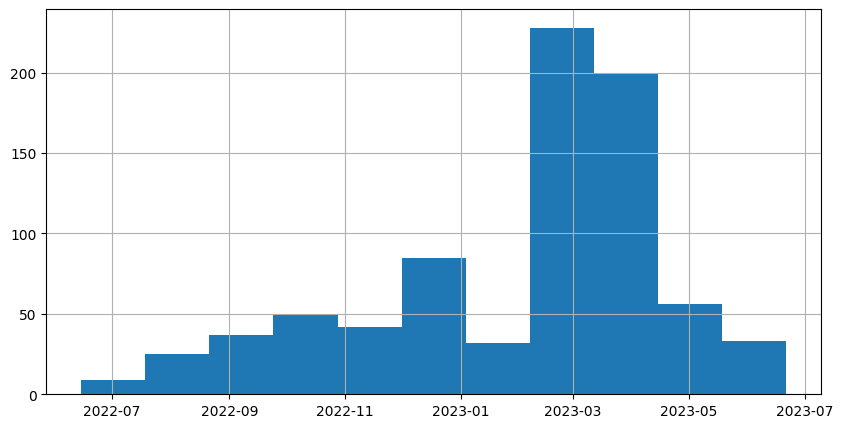

In [ ]:
donors['first_payment'].hist(bins=11, figsize=(10,5));

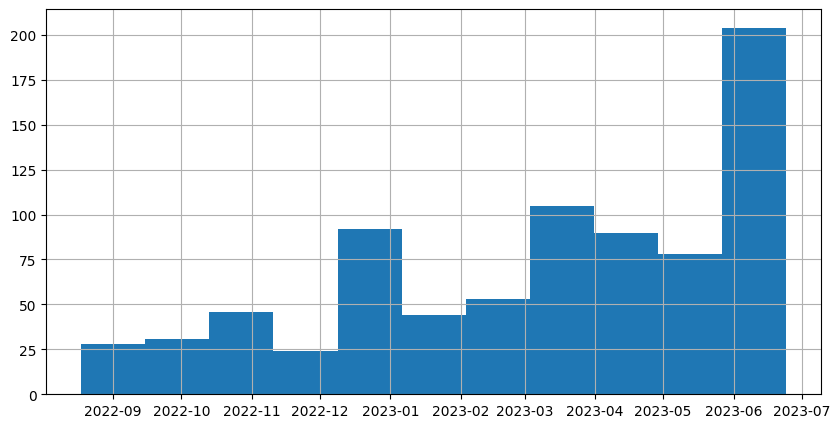

In [ ]:
donors['last_payment'].hist(bins=11, figsize=(10,5));

Распределение данных также **неравномерное**.  
Кажется, что с января по май 2023 года пожертвований было больше, чем в остальной период. Мы знаем, что часть платежей были разовыми, но отобразились в обоих столбцах - first_payment и last_payment, поэтому чтобы проверить гипотезу нужно удалить такие дубликаты если это возможно.

## Объединение датасетов clients и donors

In [ ]:
# Объединим доноров из двух платежных систем в один датасет
clients_merge = clients[['code','first_payment','last_payment','total']]
donors_merge = donors[['code','first_payment','last_payment','total']]
all_clients = pd.concat([clients_merge, donors_merge], axis=0)

# посчитаем уникальных доноров за рекламный период
donors_2023 = all_clients.sort_values('first_payment').groupby('code').agg({'first_payment':'first', 'total':'sum'}).reset_index()
donors_2023 = donors_2023.query('first_payment >= "2023-01-15"')
unic_donors_2023 = donors_2023['code'].nunique()

print('\033[1m{}\033[0m'.format(all_clients['code'].nunique()), 'всего уникальных доноров')
print('\033[1m{}\033[0m'.format(unic_donors_2023), 'из них - это новые доноры за рекламный период')
print('Всего', len(all_clients), 'строк')
# 492 дубликата, из них 264 явных (при мердже удаляются сразу) и 228 дублируется code
all_clients.head(3)

1259 всего уникальных доноров
554 из них - это новые доноры за рекламный период
Всего 1750 строк


,code,first_payment,last_payment,total
3,1121,2022-11-23,2022-11-23,500
4,1122,2021-12-29,2021-12-29,1000
6,1124,2021-12-31,2021-12-31,1000


In [ ]:
dub = all_clients.duplicated().sum()
print('Количество явных дубликатов: {} - это \033[1m{}\033[0m % от данных, удалим их.'.format(dub, int(dub / len(all_clients) * 100))) # жирный текст
all = all_clients.drop_duplicates()
dub_code = len(all) - all['code'].nunique()
print('Количество неявных дубликатов: {} - это \033[1m{}\033[0m % от данных, исследуем их, поскольку это большой процент от датасета и данных не так много.'
      .format(dub_code, int(dub_code / len(all) * 100)))

Количество явных дубликатов: 379 - это 21 % от данных, удалим их.
Количество неявных дубликатов: 112 - это 8 % от данных, исследуем их, поскольку это большой процент от датасета и данных не так много.


## Типы данных

In [ ]:
# переведем ctr в числа
adgrants['ctr_perc'] = adgrants['ctr_perc'].str.replace(',', '.').astype(float)
adgrants['ctr_perc'] = adgrants['ctr_perc'].astype(float)

In [ ]:
# переведем конверсию в числа
adgrants['conversion'] = adgrants['conversion'].replace('-', np.nan)
adgrants['conversion'] = adgrants['conversion'].str.replace(',', '.')
adgrants['conversion'] = adgrants['conversion'].astype(float)

## Неявные дуликаты в платежах

In [ ]:
# 1125 - период пересекается, сумма одинаковая (разовый платеж) - дубликат
# 1127 - период не пересекается, суммы разные -
# функция с добавлением строки в список non_dub:
# сравниваем all с dub = если all['last_payment'] < dub['first_payment'] | all['first_payment'] > dub['last_payment'] то считаем не дубликатом
# 1146, 1160 - период пересекается, суммы разные - оставляем строку с большей суммой (считаем, что это более полные данные)
# 1159 - период пересекается, сумма одинаковая = subset{}  //
#

In [ ]:
# выведем неявные дубликаты по столбцу code
dub_hidden = all[all.duplicated(subset=['code'], keep=False)]
dub_hidden = dub_hidden.sort_values(by='code')
dub_hidden.head(10)

,code,first_payment,last_payment,total
7,1125,2021-12-31,2022-10-05,300
650,1125,2022-10-05,2022-10-05,300
9,1127,2022-10-16,2022-11-16,600
688,1127,2023-03-16,2023-05-16,900
28,1146,2022-09-18,2023-05-18,3150
683,1146,2023-02-18,2023-06-18,1750
41,1159,2022-10-26,2023-06-01,300
614,1159,2022-10-26,2023-01-28,300
613,1160,2023-02-26,2023-05-26,1200
42,1160,2022-10-26,2023-05-26,2400


Неявных дубликатов много, но нельзя понять входит ли платеж в одной строке в период платежей другой строки, поскольку платежи сагрегированы по большому промежутку времени. В некоторых строках периоды времени разные, такие строки точно не являются дубликатами. Оставим все дубликаты как есть. В дальнейшем рекомендуем разделять каждый платеж по пользователю.

# Исследовательский анализ

Поскольку подробных описаний данных нет, наиболее важным показателем будем считать конверсию показа рекламы в клик. Исследуем данную конверсию по разным рекламным кампаниям, а также по всем параметрам доноров.

## Функции

In [ ]:
# сводная таблица с двумя value и sum
def table2 (df, index_1, values_1, values_2):
  table = df.pivot_table(index=index_1, values=[values_1, values_2], aggfunc='sum').reset_index()
  table['ctr_perc'] = (table[values_2] / table[values_1] * 100).round(2)
  table = table.sort_values(by='ctr_perc', ascending=False)
  return table

In [ ]:
# гистограмма по сводной sum + сортировка объёма
def hist (table, index_1, values_1, title_1, h, w):
  fig = px.bar(table, x=index_1, y= values_1, title=title_1)
  fig.update_layout(height=h, width=w)
  #fig.update_xaxes(tickangle=45)
  return fig.show()

In [ ]:
# цветовая гистограмма по сводной sum + сортировка объёма
def hist_color (table, index_1, values_1, colors, title_1, h, w):
  fig = px.bar(table, x=index_1, y= values_1, color=colors)
  fig.update_layout(height=h, width=w, title=title_1)
  return fig.show()

In [ ]:
# функция сводной таблицы sum и гистограммы по ней + сортировка объёма
def px_sum (df, index_1, values_1, title_1, h, w):
  table = df.pivot_table(index=index_1, values=values_1, aggfunc='sum').reset_index()
  table = table.rename(columns={values_1:'sum'})
  table = table.sort_values(by='sum',ascending=False)

  fig = px.bar(table, x=index_1, y='sum', title=title_1)
  fig.update_layout(height=h, width=w)
  #fig.update_xaxes(tickangle=45)
  return fig.show()

In [ ]:
# функция сводной таблицы sum с конверсией показы в клики и гистограммы по ней + сортировка объёма
def px_ctr (df, index_1, shows, clicks, title_1, h, w):
  table = df.pivot_table(index=index_1, values=[shows, clicks], aggfunc='sum').reset_index()
  table['ctr_perc'] = (table[clicks] / table[shows] * 100).round(2)
  #table = table.rename(columns={shows:'amount'})
  table = table.sort_values(by='ctr_perc',ascending=False)

  fig = px.bar(table, x=index_1, y='ctr_perc', title=title_1)
  fig.update_layout(height=h, width=w)
  #fig.update_xaxes(tickangle=45)
  return fig.show()

In [ ]:
# функция сводной таблицы sum с конверсией показы в клики и ЦВЕТНОЙ гистограммой по ней + сортировка объёма, ТОП-20
def px_ctr_color0 (df, index_1, shows, clicks, colors, title_1, h, w):
  table = df.pivot_table(index=index_1, values=[shows, clicks], aggfunc='sum').reset_index()
  table['ctr_perc'] = (table[clicks] / table[shows] * 100).round(2)
  table = table.sort_values(by=clicks,ascending=False).head(20)

  fig = px.bar(table, x=index_1, y= clicks, color=colors, color_continuous_scale='Blues')
  fig.update_layout(height=h, width=w, title=title_1)
  #fig.update_traces(marker=dict(
    #color=['#5733ff','#6747ff','#785bff','#8970ff','#9a84ff','#ab99ff','#bbadff','#ccc1ff','#ddd6ff','#eeeaff','#ffffff']))
  return fig.show()

In [ ]:
# функция сводной таблицы sum с конверсией показы в клики и ЦВЕТНОЙ гистограммой по ней + сортировка объёма, ТОП-20
def px_ctr_color (df, index_1, shows, clicks, colors, title_1, subtitle_1, h, w):
  table = df.pivot_table(index=index_1, values=[shows, clicks], aggfunc='sum').reset_index()
  table['ctr_perc'] = (table[clicks] / table[shows] * 100).round(2)
  table = table.sort_values(by=clicks,ascending=False).head(20)

  fig = px.bar(table, x=index_1, y= clicks, color=colors)
  fig.update_layout(height=h, width=w, title = title_1,
                  annotations=[dict(text=subtitle_1,x=0.5,y=0.99,showarrow=False,xref="paper",yref="paper",font=dict(size=14))])
  return fig.show()

In [ ]:
# функция сводной таблицы sum с конверсией показы в клики и ЦВЕТНОЙ гистограммой по ней + сортировка объёма, ТОП-20
def px_ctr_blue (df, index_1, shows, clicks, colors, title_1, h, w):
  table = df.pivot_table(index=index_1, values=[shows, clicks], aggfunc='sum').reset_index()
  table['ctr_perc'] = (table[clicks] / table[shows] * 100).round(2)
  table = table.sort_values(by='ctr_perc',ascending=False).head(20)

  fig = px.bar(table, x=index_1, y= 'ctr_perc', color=colors, color_continuous_scale='Blues')
  fig.update_layout(height=h, width=w, title = title_1,
                  annotations=[dict(text='Интенсивность цвета соответствует числу показов',x=0.5,y=1,showarrow=False,xref="paper",yref="paper",font=dict(size=14))])
  return fig.show()

## Анализ Adgrants - Яндекс Метрика

### Конверсия по целевому действию

В данных adgrants есть столбец с конверсией. Предположительно, он включает в себя выполнение трех целевых действий:
- Посещение страницы помощи
- Отправка формы
- Посещение страницы "Спасибо"  

In [ ]:
print()
conversion = adgrants[~adgrants['conversion'].isna()].copy()
print('Всего', '\033[1m{}\033[0m'.format(len(conversion)), 'строк с выполненными целевыми действиями.')


Всего 396 строк с выполненными целевыми действиями.


In [ ]:
conversion['conversion'].unique()

array([100.  , 200.  ,  33.33,  11.11,  50.  ,  20.  ,  66.67,  80.  ,
        25.  ,   8.33,  16.67,   6.25,  12.5 ,  18.18,   7.14,   9.09,
       150.  ,  10.53,   5.56,  75.  ,  14.29,  40.  ,  10.  , 400.  ,
        22.22,   5.88,  60.  , 300.  ,  42.86,  12.  ])

В столбце "conversion" есть значения от 1 до 400, в том числе дробные. Нет описания данных что они означают. Будем считать, что любое не нулевое значение конверсии - это совершение всех трех целевых действий, то есть платежа.

In [ ]:
# посчитаем все показы и клики
adgrants_shows = adgrants['shows'].sum()
adgrants_clicks = adgrants['clicks'].sum()
# все клики с успешным целевым действием
conv_clicks = conversion['clicks'].sum()

In [ ]:
print(line_)
print('Всего:')
print('\033[1m{}\033[0m'.format(adgrants_shows), 'показов')
print('\033[1m{}\033[0m'.format(adgrants_clicks), 'кликов')
ctr_avg = (adgrants_clicks / adgrants_shows * 100).round(2)
print('Средняя конверсия показов в клик:', '\033[1m{}\033[0m'.format(ctr_avg), '%')
print()
print('Целевые действия:')
print('Были совершены в', '\033[1m{}\033[0m'.format((conv_clicks / adgrants_shows * 100).round(3)), '% от всех показов.')
print('Были совершены в', '\033[1m{}\033[0m'.format((conv_clicks / adgrants_clicks * 100).round(1)), '% от всех кликов.')
print(_line)

────────────────────────────────────────────────────────────────────────────────────────────────────

Всего:
9853538 показов
41243 кликов
Средняя конверсия показов в клик: 0.42 %

Целевые действия:
Были совершены в 0.011 % от всех показов.
Были совершены в 2.6 % от всех кликов.

────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
px_ctr_color(conversion, 'campaign', 'shows', 'clicks', 'ctr_perc', 'Все кампании с совершенным целевым действием',
             'Интенсивность цвета соответствует конверсии показа в клик', 700, 1100)

Из всех данных с совершенным целевым действием, эти кампании имеют очень высокую конверсию:
- РК_Обустройство_клиники - **6.8%**
- РК_Общий сбор_средств - **2.8%**
- Гео - **2.6%**
- Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы - **1.3%**

In [ ]:
px_ctr_color(conversion, 'condition_showed', 'shows', 'clicks', 'ctr_perc', 'Все условия показа с совершенным целевым действием',
             'Интенсивность цвета соответствует конверсии показа в клик', 700, 1100)

Почти все клики с совершенным целевым действием были сделаны при условие показа **autotargeting**.   
Из всех остальных строк фигурируют условия показа, связанные с **погодой**.

In [ ]:
px_ctr_blue(conversion, 'age', 'shows', 'clicks', 'shows', 'Конверсия показов в клик по параметру "Возраст"', 600, 800)

In [ ]:
px_ctr_blue(conversion, 'gender', 'shows', 'clicks', 'shows', 'Конверсия показов в клик по параметру "Пол"', 600, 800)

В срезе данных по совершенному целевому действию, мало кликов, но в несколько раз выше конверсия у пользователей с **неопределенным полом (13%) и возрастом (3.2%)**. Сложно сказать что это значит... Параметры доноров будут подробно разобраны далее.

### Конверсия показов в клик по рекламным кампаниям

In [ ]:
# посмотрим среднюю конверсию показов в клики по кампаниям
campaign = adgrants.pivot_table(index='campaign', values=['shows','clicks'], aggfunc='sum').reset_index()
campaign['ctr_perc'] = (campaign['clicks'] / campaign['shows'] * 100).round(2)
campaign = campaign.sort_values(by='ctr_perc',ascending=False)

In [ ]:
# график по сводной - отображение конверсии в клик по кампаниям
fig = px.bar(campaign, x='campaign', y='ctr_perc', color='shows')
fig.update_layout(height=800, width=1250,
                  title = "Конверсия показов в клик по рекламным кампаниям",
                  annotations=[dict(text="Интенсивность цвета соответствует числу показов",x=0.5,y=0.99,showarrow=False,xref="paper",yref="paper",font=dict(size=14))])
fig.show()

Самая большая конверсия в клик у рекламных кампаний:
- Гео
- РК_Общий сбор_средств
- Бизнесмены/ ремонт больнички
- Ремонт больнички - Автотаргетинг
- Питер - Автотаргетинг  

У **Команда#2 / Бот / СПб** самое большое число показов - в **10!** раз больше, чем у лидирующей по конверсии **Гео** - при этом она имеет среднюю конверсию в клик.

Есть интересная закономерность - самую низкую конверсию в клик занимают компании с **наибольшим** количеством показов:
- РК_Больничка
- Больничка_бизнес_ключи-интересы
- РК_Ретаргетинг
- Пакет_Бездомашний очаг_Верующие_ключи-интересы
- Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы
- Пакет_Бездомашний очаг_Реабилитационные центры_ключи   
(Кампания с фиксированным СРМ №10 от 14-03-2023 - является исключением, по ней очень мало данных)

### Конверсия показов в клик по условию показа

In [ ]:
print('Всего', '\033[1m{}\033[0m'.format(adgrants['condition_showed'].nunique()),
      'условий показа. Сгруппируем по ним и посмотрим на конверсию и количество кликов в каждой группе.')

Всего 1196 условий показа. Сгруппируем по ним и посмотрим на конверсию и количество кликов в каждой группе.


In [ ]:
# Максимальное кол-во кликов и конверсия
px_ctr_color(adgrants, 'condition_showed', 'shows', 'clicks', 'ctr_perc',
             'Максимальное число кликов по "Условию показа"','Интенсивность цвета соответствует числу показов', 800, 1200)

**Половина** всех кликов было сделано при условии показа **Autotargeting** (конверсия показа в клик = 0,34%).  
На втором месте - **Благотворительность** (с конверсией выше среднего = 1.03%). В ТОП-20 по количеству кликов попали в основном тематичные условия показа, связанные с благотворительностью, фондами, волонтерством.


#### Срезы данных

In [ ]:
# Создадим сводную со срезом - конверсия от 1% и кол-во кликов более 50
condition = table2(adgrants, 'condition_showed', 'shows', 'clicks')
condition_1 = condition.query('clicks > 50 & ctr_perc >= 1')
condition_1 = condition_1.sort_values(by='ctr_perc', ascending=False).head(20)
condition_1 = condition_1.sort_values(by='clicks', ascending=False).head(20)
condition_1.head()

,condition_showed,clicks,shows,ctr_perc
113,благотворительность,2636,254767,1.03
25,Вернулись на сайт,276,17037,1.62
763,психиатр нарколог спб,89,8105,1.10
778,психологическая помощь в спб -бесплатный,87,8673,1.00
764,психиатр петербург -санкт,85,7830,1.09


In [ ]:
hist_color(condition_1, 'condition_showed', 'clicks', 'ctr_perc',
           'Параметр "Условие показа", срез - высокая конверсия от 1% и более 50 кликов', 700, 1000)

В срезе данных с **высокой конверсией, от 1%** появляются условия показов, связанные с **психологической и психиатрической помощью, и погодой.**

In [ ]:
# Создадим сводную со срезом - конверсия от 0.6% и кол-во кликов более 100
condition_2 = condition.query('clicks > 100 & ctr_perc >= 0.6')
condition_2 = condition_2.sort_values(by='ctr_perc', ascending=False).head(20)
condition_2 = condition_2.sort_values(by='clicks', ascending=False).head(20)

In [ ]:
hist_color(condition_2, 'condition_showed', 'clicks', 'ctr_perc',
           'Параметр "Условие показа", срез - хорошая конверсия от 0.6% и более 100 кликов', 700, 1000)

В срезе с конверсией выше среднего и большим количеством кликов рубрики показов не отличаются от графика по всем данным.

### Конверсия по параметрам донора

#### Возраст

In [ ]:
px_ctr_blue(adgrants, 'age', 'shows', 'clicks', 'shows', 'Конверсия показов в клик по параметру "Возраст"', 600, 800)

**Большинство людей, совершающих клик, старше 55 лет (ctr = 0.65%)**.  
**Меньше всего проявляют интерес люди в возрасте 18-34 лет (ctr = 0.33-0.2%).**   
Но есть нюансы сегментации - возрастные **сегменты не равны**, это может искажать выводы. Например, если мы уменьшим верхнюю границу сегмента "старше 55" до 64 лет (до диапазона в 10 лет, как в других сегментах) может оказаться, что в возрасте 55-64 лет конверсия в клики такая же, как и в сегменте 35-44. А если наоборот расширить сегмент 18-24 с 15 лет (диапазон 7 лет увеличить до 10, как в средних по возрасту сегментах), то конверсия может также сравняться.  
Можем точно сказать, что в диапазоне с 25 до 54 лет, охотнее кликают на рекламу люди **в возрасте 35-54 лет**.  

Видно, что кол-во показов в сегменте **"старше 55"** в 1.5-2 раза выше, чем в остальных сегментах. Поскольку конверсия в этом сегменте выше - то **стоит продолжать ориентировать рекламу** на данный возрастной сегмент.  
**Стоит сместить рекламный фокус с сегментов с низкой конверсией кликов, на сегмент 35-54 лет.**

#### Пол

In [ ]:
px_ctr_blue(adgrants, 'gender', 'shows', 'clicks', 'shows','Конверсия показов в клик по параметру "Пол"', 600, 800)

Вопреки популярному мнению, **женщины и мужчины проявляют практически одинаковый интерес к пожертвованиям** - конверсии показов в клик 0.44% и 0.38% соответственно. Тем не менее мы видим, что **реклама показывалась почти в 2 раза чаще женщинам**. Зная, что конверсия почти одинаковая логичнее распределить показы в группах поровну (теоретически, это даже может увеличить конверсию в группе мужчин, если женщинам реклама показывалась в избытке).  
Примерно в 3% показов пол был не определён.

Рассмотрим отдельно сегмент "старше 55" лет мужчины и женщины

In [ ]:
age_55 = adgrants.query('age == "старше 55"')
px_ctr_blue(age_55, 'gender', 'shows', 'clicks', 'shows','Конверсия показов в клик по параметру "Пол"', 600, 800)

В самой активной возрастной категории конверсия между женщинами и мужчинами различается чуть больше - 0.7% и 0.6% соответственно.

#### Платёжеспособность

In [ ]:
# рассмотрим параметр платёжеспособность
px_sum(adgrants, 'solvency', 'clicks', 'Количество кликов по параметру "платёжеспособность"', 600, 800)

В большинстве случаев платёжеспособность не определена. Не будем анализировать данный параметр.

## Анализ платежей clients и donors

Датасет **all** - это объединенные пожертвования из clients и donors, совершенные с конца 2021 до конца 2023 годов. Необходимо понять, есть ли связь, между рекламными кампаниями и платежами. Поскольку, рекламные кампании проходили с января до июля 2023 года, мы будем рассматривать срез платежей, которые входят в этот период. Для нас важна первая дата платежа (предполагаем, что человек увидел рекламу, среагировал, заплатил). Поэтому создадим датасет **all_2023** в котором дата первого платежа входит в диапазон времени проведения рекламных кампаний - 01.2023 - 07.2023.

**Примечание:** мы не знаем, почему платежи некоторых доноров повторяются в выгрузке платежной системы, поэтому не будем исключать строки с донорами, замечеными в перод ранее рекламного (возможно, рекламная кампания повлияла на повторный платеж, который вынесен отдельно). Поэтому далее уникальные доноры посчитаны в срезе с января 2023 года.

### Общая сумма пожертвований

In [ ]:
# датасет платежей РЕКЛАМНОГО периода
# ограничим диапазон по дате проведения кампаний
all_2023 = all.query('first_payment >= "2023-01-15" & first_payment <= "2023-07-19"').copy()
# сгруппируем датасет по уникальным пользователям по дате первого платежа, взносы суммируем в столбце total
all_2023 = all_2023.sort_values('first_payment').groupby('code').agg({'first_payment':'first', 'total':'sum'}).reset_index()
# добавим столбец месяца
all_2023['month'] = all_2023['first_payment'].dt.month
print('Уникальных доноров за январь-июль 2023 г:', '\033[1m{}\033[0m'.format(all_2023['code'].nunique()))
all_2023.head(3)

Уникальных доноров за январь-июль 2023 г: 621


,code,first_payment,total,month
0,1127,2023-03-16,900,3
1,1146,2023-02-18,1750,2
2,1147,2023-03-15,300,3


In [ ]:
# датасет платежей ОСТАЛЬНОГО периода
donors_2021_2022 = all.query('first_payment < "2023-01-15"').copy()
# добавим столбец год-месяц
donors_2021_2022['month'] = pd.to_datetime(donors_2021_2022['first_payment']).dt.to_period('M').astype('str')

In [ ]:
mean_payment1 = (all_2023.groupby('code')['total'].sum().sum()).astype(int)
mean_payment2 = (donors_2021_2022.groupby('code')['total'].sum().sum()).astype(int)
sum_all = all.groupby('code')['total'].sum().sum()
print(line_)
print('Общая сумма пожертвований', '\033[1m{}\033[0m'.format(sum_all))
print()
print('За рекламный период (7 месяцев 2023 года) -', '\033[1m{}\033[0m'.format(mean_payment1), 'руб.')
print('За остальной период (18 месяцев 2021/22 годов) -', '\033[1m{}\033[0m'.format(mean_payment2), 'руб.')
print(_line)

────────────────────────────────────────────────────────────────────────────────────────────────────

Общая сумма пожертвований 2887399

За рекламный период (7 месяцев 2023 года) - 1300406 руб.
За остальной период (18 месяцев 2021/22 годов) - 1586993 руб.

────────────────────────────────────────────────────────────────────────────────────────────────────


### Средняя сумма пожертвования

In [ ]:
print()
mean_payment1 = (all_2023.groupby('code')['total'].mean().mean()).astype(int)
print('Средняя сумма пожертвований человека за рекламный период', '\033[1m{}\033[0m'.format(mean_payment1), 'руб.')
mean_payment2 = (donors_2021_2022.groupby('code')['total'].mean().mean()).astype(int)
print('Средняя сумма пожертвований человека за весь период', '\033[1m{}\033[0m'.format(mean_payment2), 'руб.')
print()
print('За рекламный период средняя сумма пожертвований уменьшилась на',
      '\033[1m{}\033[0m'.format((100-mean_payment1/mean_payment2*100).astype(int)),'%.')


Средняя сумма пожертвований человека за рекламный период 2094 руб.
Средняя сумма пожертвований человека за весь период 2200 руб.

За рекламный период средняя сумма пожертвований уменьшилась на 4 %.


In [ ]:
mean_payment1 = (all_2023.groupby('code')['total'].median().median()).astype(int)
mean_payment2 = (donors_2021_2022.groupby('code')['total'].median().median()).astype(int)

print(line_)
print('Средняя по медиане сумма пожертвований человека за рекламный период', '\033[1m{}\033[0m'.format(mean_payment1), 'руб.')
print('Средняя по медиане сумма пожертвований человека за весь период', '\033[1m{}\033[0m'.format(mean_payment2), 'руб.')
print()
print('За рекламный период средняя по медиане сумма пожертвований увеличилась на',
      '\033[1m{}\033[0m'.format((100-mean_payment2/mean_payment1*100).astype(int)),'%.')
print(_line)

────────────────────────────────────────────────────────────────────────────────────────────────────

Средняя по медиане сумма пожертвований человека за рекламный период 900 руб.
Средняя по медиане сумма пожертвований человека за весь период 750 руб.

За рекламный период средняя по медиане сумма пожертвований увеличилась на 16 %.

────────────────────────────────────────────────────────────────────────────────────────────────────


Такая разница медианы и среднего арифметического значения говорит о выбросах - **несколько людей сделало очень большие пожертвования**, рассмотрим это дальше.

In [ ]:
mean_2023 = (all_2023.groupby('month')['total'].sum().mean()).astype(int)
mean_2023
mean_2021_2022 = (donors_2021_2022.groupby('month')['total'].sum().mean()).astype(int)
mean_2021_2022

print(line_)
print('Средняя сумма пожертвований в месяц за рекламный период', '\033[1m{}\033[0m'.format(mean_2023), 'руб.')
print('Средняя сумма пожертвований в месяц за остальной период', '\033[1m{}\033[0m'.format(mean_2021_2022), 'руб.')
print()
print('За рекламный период средняя сумма пожертвований в месяц увеличилась на',
      '\033[1m{}\033[0m'.format((100-mean_2021_2022/mean_2023*100).astype(int)),'%.')
print(_line)

────────────────────────────────────────────────────────────────────────────────────────────────────

Средняя сумма пожертвований в месяц за рекламный период 216734 руб.
Средняя сумма пожертвований в месяц за остальной период 105799 руб.

За рекламный период средняя сумма пожертвований в месяц увеличилась на 51 %.

────────────────────────────────────────────────────────────────────────────────────────────────────


### Доля от фонда

Рассмотрим отдельно из каких доноров состоит фонд. Разобъем их на группы в зависимости от общей пожертвованной суммы за весь период. Оценим долю вложений от каждой группы и долю доноров от общего числа.

In [ ]:
# сгруппируем датасет по уникальным пользователям по дате первого платежа, взносы суммируем в столбце total
reach_donors = all.sort_values('first_payment').groupby('code').agg({'first_payment':'first', 'total':'sum'}).reset_index()
reach_donors = reach_donors.pivot_table(index='code', values='total', aggfunc='sum').reset_index()

In [ ]:
reach_donors.sort_values(by='total', ascending=False).head()

,code,total
552,1847,130000
323,1592,55000
1016,2515,55000
810,2132,51000
995,2378,50000


In [ ]:
# Разбиваем клиентов на группы по величине вложения денег
bins = [0, 2000, 10000, 20000, 50000, float('inf')]
labels = ['до 2000', '2000-10.000', '10.000-20.000', '20.000-50.000', '> 50.000']
reach_donors['Investment_Group'] = pd.cut(reach_donors['total'], bins=bins, labels=labels)

# Считаем количество клиентов в каждой группе
client_count = reach_donors.groupby('Investment_Group')['total'].count()

# Считаем долю клиентов от общего числа клиентов для каждой группы
client_percentage = client_count / client_count.sum() * 100

# Считаем долю от рынка для каждой группы
market_share = reach_donors.groupby('Investment_Group')['total'].sum() / reach_donors['total'].sum()

# Создаем круговую диаграмму с цветовой гаммой по доле от рынка
fig = px.pie(
    names=market_share.index,
    values=market_share.values,
    title='Доля пожертвований по сумме вложений',
    color_discrete_sequence=px.colors.sequential.Blues_r,  # Выбираем подходящую цветовую палитру
    custom_data=[client_count.values, client_percentage.values]  # Добавляем данные о количестве клиентов и доле в процентах
)

# Добавляем информацию о количестве клиентов и доле в процентах в каждой группе в текстовую подпись
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='%{label}: %{percent:.1%}<br>Доноры: %{customdata[0]}<br>Доля: %{customdata[1]:.1f}%',
    texttemplate='%{percent:.1%}<br>%{label}<br>Доноры: %{customdata[0]}<br>Доля: %{customdata[1]:.1f}%',
    pull=[0.02] * len(market_share)
)
fig.update_layout(width=700, height=700)
fig.show()


Мы разделили всех доноров на 5 групп по сумме вложений за весь период:  
- 25% от суммы пожертвований сделали 79% доноров суммой до 2000 руб.
- 35% от суммы пожертвований сделали 18% доноров суммой от 2000 до 10.000
- 14% от суммы пожертвований сделали 2% доноров суммой от 10.000 до 20.000
- 17% от суммы пожертвований сделали 1.2% доноров суммой от 20.000 до 50.000
- и 10% суммы пожертвований сделали 0.3% доноров суммой более 50.000 руб.  

**Большинство привлеченных людей (79% - 992 человека) составило только четверть фонда (платежи до 2000 руб.).  
И всего 1,5% людей (19 человек) также составило четверть фонда (платежи более 20.000 руб.).**

**Объединим три группы с пожертвованиями от 10.000 руб. и получим, что всего 3,6% людей (45 человек) составило 40% фонда (платежи более 10.000 руб.).**  

Стоит проанализировать из каких источников приходят крупные пожертвования и направить рекламу на них.

### Пожертвования по месяцам

**Примечание:** поскольку данные собраны неудобно - платежи сагрегированы по периодам от первой до последней оплаты, и есть 13% доноров-дубликатов, которых невозможно куда-либо определить - то при оценке сумм всех платежей по месяцам не будем группировать доноров по первой дате, иначе мы можем получить противоречивые данные.

In [ ]:
# подготовим датасет ПО МЕСЯЦАМ со всеми донорами для графика
all_by_month = all.copy()
# добавим столбец год-месяц
all_by_month['month'] = pd.to_datetime(all_by_month['first_payment']).dt.to_period('M').astype('str')
# Сгруппируем пользователей по дате первого платежа и месяцу
all_diagramm = all_by_month.groupby(['first_payment','month']).agg({'code':'count', 'total':'sum'}).reset_index()
diagramm = all_diagramm.groupby('month').agg({'code':'count', 'total':'sum'}).reset_index()
diagramm['month'] = pd.to_datetime(diagramm['month'])

In [ ]:
# Создаем рекламные и простые даты
start_date = '2023-01-01'
end_date = '2023-07-19'
threshold_date_range = pd.date_range(start=start_date, end=end_date)
# Создаем отдельные списки для дат до и после пороговой даты
dates_before_threshold = diagramm[~diagramm['month'].isin(threshold_date_range)]['month']
dates_after_threshold = diagramm[diagramm['month'].isin(threshold_date_range)]['month']

# Создаем график с двумя группами столбцов
fig = go.Figure()

# Добавляем столбцы для дат до рекламной даты
fig.add_trace(go.Bar(
    x=dates_before_threshold,
    y=diagramm.loc[~diagramm['month'].isin(threshold_date_range), 'total'],
    marker=dict(color='#636efa'),
    name='Простые даты'))
# Добавляем столбцы для дат после рекламной даты
fig.add_trace(go.Bar(
    x=dates_after_threshold,
    y=diagramm.loc[diagramm['month'].isin(threshold_date_range), 'total'],
    marker=dict(color='red'),
    name='Рекламные даты'))

# Обновляем макет графика
fig.update_layout(
    height=600,
    width=1200,
    title='Суммы пожертвований по месяцам за 2021 и 2023 года',
    barmode='stack')  # Это позволяет столбцам находиться в одной колонке

fig.show()

Видно, что за рекламный период действительно было привлечено гораздо больше средств, особенно в феврале и марте.

In [ ]:
# Сумма пожертвований по месяцам рекламного периода
all_by_month_2023 = all_2023.groupby('month').agg({'code':'count', 'total':'sum'}).reset_index()
all_by_month_2023

,month,code,total
0,1,29,46050
1,2,150,437384
2,3,280,605469
3,4,102,141349
4,5,38,47804
5,6,22,22350


In [ ]:
fig = px.bar(all_by_month_2023, x='month', y='total')
fig.update_layout(height=500, width=800, title = 'Общая сумма пожертвований по месяцам рекламного периода 2023 года')
fig.show()

In [ ]:
sum_2_3 = all_by_month_2023.query('month == 2 | month == 3').total.sum()
print(line_)
print('За два самых активных месяца - февраль и март 2023 года - было пожертвовано',
      '\033[1m{}\033[0m'.format(all_by_month_2023.loc[1,'total']), 'и', '\033[1m{}\033[0m'.format(all_by_month_2023.loc[2,'total']), 'рублей.')
print('\033[1mЭто\033[0m', '\033[1m{}\033[0m'.format((sum_2_3 / sum_all *100).astype(int)),'\033[1m% от суммы пожертвований за весь период.\033[0m')
print(_line)

────────────────────────────────────────────────────────────────────────────────────────────────────

За два самых активных месяца - февраль и март 2023 года - было пожертвовано 437384 и 605469 рублей.
Это 36 % от суммы пожертвований за весь период.

────────────────────────────────────────────────────────────────────────────────────────────────────


### Пожертвования по дням

In [ ]:
threshold_date = pd.to_datetime('2023-01-15')
# Создаем рекламные и простые даты
dates_before_threshold = all_by_month[all_by_month['first_payment'] < threshold_date]['first_payment']
dates_after_threshold = all_by_month[all_by_month['first_payment'] >= threshold_date]['first_payment']

# Создаем график с двумя группами столбцов
fig = go.Figure()

# Добавляем столбцы для дат до пороговой даты
fig.add_trace(go.Bar(
    x=dates_before_threshold,
    y=all_by_month.loc[all_by_month['first_payment'] < threshold_date, 'total'],
    marker=dict(color='#636efa'),
    name='Простые даты'))
# Добавляем столбцы для дат после пороговой даты
fig.add_trace(go.Bar(
    x=dates_after_threshold,
    y=all_by_month.loc[all_by_month['first_payment'] >= threshold_date, 'total'],
    marker=dict(color='red'),
    name='Рекламные даты'))

# Обновляем макет графика
fig.update_layout(
    height=600,
    width=1200,
    title='Суммы пожертвований по дням за 2021 и 2023 года',
    barmode='stack')  # Это позволяет столбцам находиться в одной колонке

fig.show()

В некоторые дни мы видим пики по сумме пожертвований. Но поскольку первая дата платежа не обязательно означает платеж и все платежи донора суммированы, то мы не можем сделать какие-либо выводы. Но рассмотреть эти дни стоит внимательнее.   **Возможно, в эти дни были привлечени доноры, которые в дальнейшем принесли хорошее вложение в фонд (проводилась рекламная кампания или мероприятие).**

In [ ]:
print('Возможные даты, в которых было совершено много пожертвований или которые привлекли щедрых доноров:')
top_date = all_by_month.groupby('first_payment').agg({'total':'sum'}).reset_index()
top_date.sort_values(by='total', ascending=False).head(4)

Возможные даты, в которых было совершено много пожертвований или которые привлекли щедрых доноров:


,first_payment,total
293,2023-03-21,159400
270,2023-02-26,157474
128,2022-08-22,105550
20,2021-12-23,96750


# ВЫВОДЫ

Проведена исследовательская аналитика эффективности маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях для НКО Благотворительная Больница.  
Предобработка данных включала:
- знакомство с большим объемом параметров, выгруженных из Яндекс Метрики и сужение их до необходимых столбцов
- перевод дат и времени в правильный формат, проверка диапазона дат, равномерность собранных данных
- объединение датасетов и выявление дубликатов доноров
- удаление строк с пустыми платежами

**Результат исследовательского анализа**  
**Анализ данных из Яндекс Метрики (датасет adgrants)**  
- Всего за рекламный период: **9853538** показов, **41243** кликов.  
Средняя конверсия показов в клик: **0.42 %**  
- **Целевые действия:** были совершены в **0.011 %** от всех показов и в **2.6 %** от всех кликов.

- Самая большая конверсия в клик у рекламных кампаний: **Гео, РК_Общий сбор_средств, Бизнесмены/ ремонт больнички, Ремонт больнички - Автотаргетинг, Питер - Автотаргетинг**
- У **Команда#2 / Бот / СПб** самое большое число показов - в 10! раз больше, чем у лидирующей по конверсии Гео - при этом она имеет среднюю конверсию в клик.

- Есть интересная закономерность - **самую низкую конверсию в клик занимают компании с наибольшим количеством показов:** РК_Больничка, Больничка_бизнес_ключи-интересы, РК_Ретаргетинг, Пакет_Бездомашний очаг_Верующие_ключи-интересы, Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы, Пакет_Бездомашний очаг_Реабилитационные центры_ключи
(Кампания с фиксированным СРМ №10 от 14-03-2023 - является исключением, по ней очень мало данных)

- Половина всех кликов было сделано при условии показа **Autotargeting** (конверсия показа в клик = 0,34%). На втором месте - **Благотворительность** (с конверсией выше среднего = 1.03%). В ТОП-20 по количеству кликов попали в основном тематичные условия показа, связанные с благотворительностью, фондами, волонтерством.

- В срезе данных с **высокой конверсией, от 1%** появляются условия показов, связанные с **психологической и психиатрической помощью, и погодой.**  




**Конверсия по целевым действиям**
- Целевые действия были совершены в **0.011 %** от всех показов.  
Целевые действия были совершены в **2.6 %** от всех кликов.
- Из всех данных с совершенным целевым действием, эти кампании имеют очень высокую конверсию: РК_Обустройство_клиники - 6.8%, РК_Общий сбор_средств - 2.8%, Гео - 2.6%, Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы - 1.3%
- Почти все клики с совершенным целевым действием были сделаны при условие показа **autotargeting**.
Из всех остальных строк фигурируют условия показа, связанные с **погодой - это отличает клики с совершенным целевым действием от обычных кликов.**
- Очень мало кликов, но в несколько раз выше конверсия у пользователей с **неопределенным полом (13%) и возрастом (3.2%)**.

**Конверсия показов в клик по параметрам пользователя**  
- **Возраст:** Большинство людей, совершающих клик, старше 55 лет (ctr = 0.65%).
Меньше всего проявляют интерес люди в возрасте 18-34 лет (ctr = 0.33-0.2%).
В диапазоне с 25 до 54 лет, охотнее кликают на рекламу люди в возрасте 35-54 лет.
- **Пол:** Вопреки популярному мнению, **женщины и мужчины проявляют практически одинаковый интерес к пожертвованиям - конверсии показов в клик 0.44% и 0.38%** соответственно. А в срезе данных по совершенному целевому действию, конверсия показов в клик **у мужчин даже немного выше, чем у женщин (0.51% и 0.45%)**
- **Платежеспособность:** В большинстве случаев не определена.

**Анализ данных по пожертвованиям из clients и donors**   
- Общая сумма пожертвований **2887399**: за рекламный период - **1300406** руб., за остальной период - **1586993** руб.
- Всего **1259** уникальных доноров, **554** из них - это новые доноры за рекламный период.
- За два самых активных месяца - февраль и март 2023 года - было пожертвовано **437384** и **605469** рублей.  
  **Это 36 % от суммы пожертвований за весь период.**
- Средняя сумма пожертвований человека за рекламный период **2094** руб., за весь период - **2200** руб.  
  **За рекламный период средняя сумма пожертвований уменьшилась на 4 %.**  
- Средняя по медиане сумма пожертвований человека за рекламный период **900** руб., за весь период - **750** руб.     
  **За рекламный период средняя по медиане сумма пожертвований увеличилась на 16 %.**  
  Смещение арифметического среднего от медианы говорит о том, что несколько людей сделало очень большие пожертвования.
- Средняя сумма пожертвований в месяц за рекламный период **216734** руб., за остальной период - **105799** руб.  
  **За рекламный период средняя сумма пожертвований в месяц увеличилась на 51 %.**
- В некоторые дни есть пики по сумме пожертвований. Возможно, в эти дни были привлечени доноры, которые в дальнейшем принесли хорошее вложение в фонд (проводилась рекламная кампания или мероприятие).

**Доля от фонда**  
Из каких доноров по общей сумме пожертвования состоит фонд:
- **Большинство привлеченных людей (79% - 992 человека) составило только четверть фонда (платежи до 2000 руб.).**   
- И всего 1,5% людей (19 человек) также составило четверть фонда (платежи более 20.000 руб.).
- Если объединить три платежеспособные группы то получим, что **всего 3,6% людей (45 человек) составило 40% фонда (платежи более 10.000 руб.).**

**Рекомендации:**
- **Главная рекомендация - правильно собрать данные для следующего анализа:**  
1) Связать платежи доноров с данными в Яндекс Метрике, чтобы понимать какого числа и от какой рекламной кампании пришел донор.   
2) Поставить разные метки на доноров, пришедших через рекламные компании, и остальных.  
3) НЕ группировать платежи от одного пользователя, оставить каждый платеж отдельно (сможем наблюдать динамику платежей, обработать неявные дубликаты, сейчас их очень много).  
4) Разделить целевые действия на разные конверсии.  
5) Прислать подробное описание данных что есть что.

- **Возраст:** Количество показов в сегменте "старше 55" в 1.5-2 раза выше, чем в остальных сегментах. Поскольку конверсия в этом сегменте выше - то стоит продолжать ориентировать рекламу на данный возрастной сегмент.
Стоит сместить рекламный фокус с сегментов с низкой конверсией кликов, на сегмент 35-54 лет.  
- **Пол:**  Зная, что конверсия показов в клик у женщин и мужчин почти одинаковая логичнее распределить показы в группах поровну (сейчас реклама показывается почти в 2 раза чаще женщинам).  
- **Платежеспособность:** Стоит обратить внимание на этот параметр, поскольку из раздела "Доля от фонда" видно, что почти половину всех пожертвований сделало 3,6% всех привлеченных людей, вложивших от 10.000 руб. за весь период.  Можно направить рекламу на эти группы или привлечь каким-либо другим способом.
- **Даты:** изучить даты с пиковыми суммами пожертвований (2023-03-21, 2023-02-26, 2022-08-22, 2021-12-23) - проводились ли дополнительные мероприятия? Были ли запущены новые рекламные кампании? (график "Пожертвования по дням").  

**Удачи!**